In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('gurgaon_properties_outlier_treated.csv')

In [5]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,house,international city by sobha phase 2,sector 109,8.75,24306.0,3600.0,Plot area 400(334.45 sq.m.),5.0,5.0,3+,3.0,North-East,New Property,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,2.0,153.0,720.000000
1,house,eldeco mansionz,sector 48,6.40,23704.0,2700.0,Plot area 365(305.19 sq.m.)Built Up area: 366 ...,4.0,4.0,3,3.0,West,Moderately Old,NaN,366.00,NaN,0.0,1.0,1.0,0.0,0.0,2.0,151.0,675.000000
2,flats,bestech park view city,sector 49,2.90,12170.0,2383.0,Super Built up area 2383(221.39 sq.m.),4.0,4.0,3+,5.0,South-West,Moderately Old,2383.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,117.0,595.750000
3,flats,denso haryana housing society,manesar,0.90,4308.0,2089.0,Carpet area: 2089 (194.07 sq.m.),3.0,3.0,3+,5.0,East,Moderately Old,NaN,NaN,2089.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,696.333333
4,flats,experion windchants,sector 112,3.40,12134.0,2802.0,Super Built up area 2802(260.31 sq.m.)Built Up...,3.0,3.0,2,14.0,North-East,Relatively New,2802.0,2225.56,NaN,0.0,0.0,0.0,0.0,0.0,2.0,159.0,934.000000


In [6]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1012
agePossession             0
super_built_up_area    1677
built_up_area          2439
carpet_area            1713
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

# Built up area

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

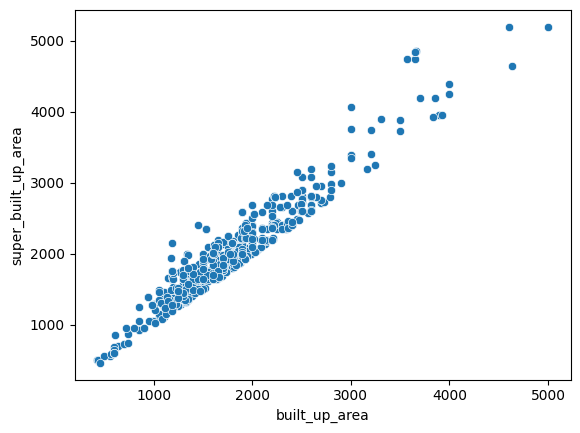

In [7]:
sns.scatterplot(x= df['built_up_area'],y= df['super_built_up_area'])

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

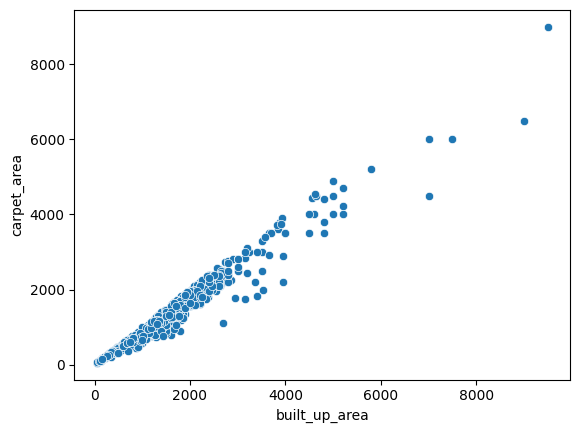

In [8]:
sns.scatterplot(x= df['built_up_area'],y= df['carpet_area'])

In [9]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))

0        True
1       False
2       False
3       False
4       False
        ...  
3547    False
3548    False
3549    False
3550    False
3551    False
Length: 3552, dtype: bool

In [13]:
df_null = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())] 

In [16]:
df_null

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,house,international city by sobha phase 2,sector 109,8.75,24306.0,3600.0,Plot area 400(334.45 sq.m.),5.0,5.0,3+,3.0,North-East,New Property,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,2.0,153.0,720.000000
10,house,suncity essel towers,sector 28,6.00,22222.0,2700.0,Plot area 300(250.84 sq.m.),4.0,4.0,3+,3.0,East,Old Property,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,2.0,89.0,675.000000
28,house,independent,sector 24,3.50,32407.0,1080.0,Plot area 120(100.34 sq.m.),2.0,4.0,3,3.0,North-West,Old Property,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,15.0,540.000000
36,house,dlf city plots phase 2,sector 25,4.50,33333.0,1350.0,Plot area 150(125.42 sq.m.),5.0,3.0,2,3.0,NaN,Old Property,NaN,NaN,NaN,0.0,0.0,1.0,1.0,0.0,0.0,25.0,270.000000
39,house,ansal sushant lok plots,sector 43,5.80,29974.0,1935.0,Plot area 215(179.77 sq.m.),6.0,6.0,3,2.0,South-West,Relatively New,NaN,NaN,NaN,0.0,1.0,0.0,0.0,1.0,2.0,49.0,322.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3499,house,rattan vihar rajendra park,dwarka expressway,0.85,14167.0,600.0,Plot area 600(55.74 sq.m.),1.0,5.0,3+,4.0,NaN,New Property,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,600.000000
3502,house,independent,sector 2,5.70,22637.0,2518.0,Plot area 270(225.75 sq.m.),9.0,9.0,3+,3.0,North-East,Moderately Old,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,2.0,0.0,279.777778
3513,house,independent,sector 7,0.90,10000.0,900.0,Plot area 100(83.61 sq.m.),2.0,4.0,3,3.0,North-East,Old Property,NaN,NaN,NaN,0.0,1.0,0.0,0.0,1.0,2.0,44.0,450.000000
3535,house,ss aaron ville,sector 49,6.75,19737.0,3420.0,Plot area 380(317.73 sq.m.),5.0,4.0,2,2.0,North,Old Property,NaN,NaN,NaN,1.0,1.0,1.0,0.0,0.0,0.0,78.0,684.000000


In [14]:
count_null = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())].shape[0]

In [15]:
count_null

472

In [17]:
df['built_up_area'].fillna(df['area'], inplace=True)

/var/folders/kw/6wv56dfd1g90mmjkfvrm90ww0000gn/T/ipykernel_32062/1866564297.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['built_up_area'].fillna(df['area'], inplace=True)


In [18]:
count_null = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())].shape[0]

In [19]:
count_null

0

In [20]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [21]:
all_present_df.shape

(952, 24)

In [22]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [23]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [24]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.0582549348617107 0.875


In [25]:
# both present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [26]:
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio


In [27]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

/var/folders/kw/6wv56dfd1g90mmjkfvrm90ww0000gn/T/ipykernel_32062/1215074969.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)


In [28]:
df.update(sbc_df)

In [30]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1012
agePossession             0
super_built_up_area    1677
built_up_area             0
carpet_area            1713
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [31]:
# sb present c is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [32]:
sb_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio


In [33]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

/var/folders/kw/6wv56dfd1g90mmjkfvrm90ww0000gn/T/ipykernel_32062/1714170073.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)


In [34]:
df.update(sb_df)

In [35]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1012
agePossession             0
super_built_up_area    1677
built_up_area             0
carpet_area            1713
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [36]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [37]:
c_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio


In [38]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

/var/folders/kw/6wv56dfd1g90mmjkfvrm90ww0000gn/T/ipykernel_32062/2136919732.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)


In [39]:
df.update(c_df)

In [40]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1012
agePossession             0
super_built_up_area    1677
built_up_area             0
carpet_area            1713
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

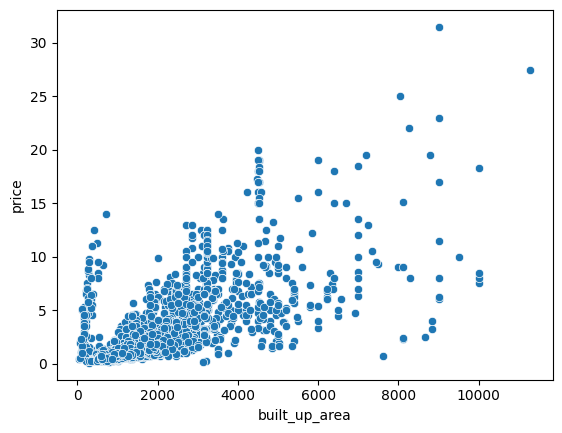

In [41]:
sns.scatterplot(x= df['built_up_area'],y= df['price'])

In [42]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [43]:
anamoly_df.sample(5)

,price,area,built_up_area
746,2.79,1969.0,1969.0
49,2.78,1829.0,1829.0
1389,2.55,1860.0,1600.0
2431,6.50,1800.0,1800.0
1191,3.50,1975.0,1975.0


In [44]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [45]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

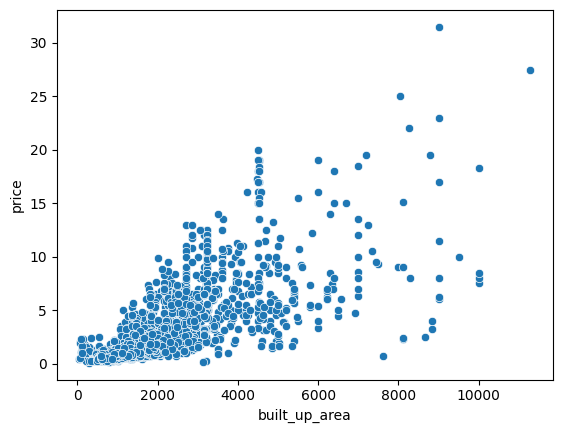

In [46]:
sns.scatterplot(x= df['built_up_area'],y= df['price'])

In [47]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

In [48]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,international city by sobha phase 2,sector 109,8.75,24306.0,5.0,5.0,3+,3.0,North-East,New Property,3600.00,1.0,1.0,1.0,1.0,0.0,2.0,153.0
1,house,eldeco mansionz,sector 48,6.40,23704.0,4.0,4.0,3,3.0,West,Moderately Old,2700.00,0.0,1.0,1.0,0.0,0.0,2.0,151.0
2,flats,bestech park view city,sector 49,2.90,12170.0,4.0,4.0,3+,5.0,South-West,Moderately Old,2383.00,0.0,1.0,0.0,0.0,0.0,0.0,117.0
3,flats,denso haryana housing society,manesar,0.90,4308.0,3.0,3.0,3+,5.0,East,Moderately Old,2089.00,0.0,1.0,0.0,0.0,0.0,0.0,7.0
4,flats,experion windchants,sector 112,3.40,12134.0,3.0,3.0,2,14.0,North-East,Relatively New,2225.56,0.0,0.0,0.0,0.0,0.0,2.0,159.0


In [49]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1012
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

# floorNum

In [50]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
501,house,dlf new town heights,sector 86,2.47,7719.0,4.0,4.0,3+,NaN,West,Moderately Old,2800.0,0.0,1.0,0.0,1.0,0.0,2.0,130.0
711,house,independent,sector 26,4.60,12198.0,4.0,4.0,3+,NaN,NaN,Old Property,3771.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0
1322,flats,NaN,sector 78,0.60,3692.0,2.0,2.0,0,NaN,NaN,Under Construction,1625.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1514,house,jacob pura,sector 12,0.35,9722.0,2.0,1.0,0,NaN,NaN,Old Property,360.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1683,house,ansal sushant lok plots,sector 43,3.30,26570.0,1.0,1.0,0,NaN,NaN,Under Construction,1242.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1687,house,vipul tatvam villa,sector 48,8.50,26235.0,4.0,4.0,2,NaN,East,Moderately Old,3240.0,0.0,1.0,1.0,1.0,0.0,0.0,88.0
1812,house,independent,sector 3,1.50,10288.0,3.0,3.0,0,NaN,NaN,Old Property,210.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1831,house,independent,sector 24,1.45,2984.0,3.0,3.0,1,NaN,NaN,Old Property,4860.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
1987,flats,experion heartsong,dwarka expressway,1.08,6150.0,3.0,3.0,0,NaN,NaN,Under Construction,1758.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2496,house,independent,sector 4,4.12,8889.0,2.0,1.0,3+,NaN,NaN,Moderately Old,4635.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [52]:
df['floorNum'].fillna(2.0,inplace=True)

/var/folders/kw/6wv56dfd1g90mmjkfvrm90ww0000gn/T/ipykernel_32062/15612474.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['floorNum'].fillna(2.0,inplace=True)


In [53]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1012
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

In [54]:
1011/df.shape[0]

0.2846283783783784

# facing

<Axes: ylabel='count'>

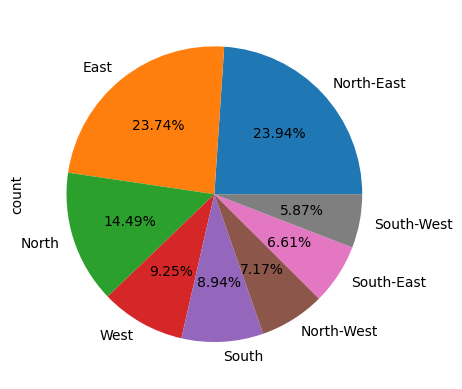

In [55]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [56]:
df.drop(columns=['facing'],inplace=True)

In [57]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2225,flats,corona optus,sector 37c,1.25,7176.0,3.0,3.0,3,2.0,Relatively New,1742.0,1.0,0.0,0.0,0.0,0.0,0.0,49.0
1320,flats,m3m soulitude,sector 89,1.30,8701.0,3.0,3.0,2,1.0,New Property,1494.0,0.0,0.0,0.0,0.0,1.0,0.0,45.0
1298,flats,dlf regency park,sector 28,2.30,11819.0,3.0,3.0,3,7.0,Moderately Old,1777.0,0.0,1.0,0.0,0.0,0.0,0.0,117.0
137,flats,ats tourmaline,sector 109,2.30,8897.0,3.0,4.0,3+,10.0,New Property,2585.0,0.0,1.0,0.0,0.0,1.0,0.0,74.0
2183,flats,ats tourmaline,sector 109,2.25,8704.0,3.0,4.0,3,14.0,Relatively New,2585.0,0.0,1.0,0.0,0.0,0.0,0.0,101.0


In [58]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [59]:
df.drop(index=[2536],inplace=True)

In [60]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

# agePossession

In [61]:
df['agePossession'].value_counts()

agePossession
Relatively New        1606
New Property           557
Moderately Old         542
Old Property           292
Undefined              291
Under Construction     263
Name: count, dtype: int64

In [62]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
17,flats,sapphire eighty three,sector 83,0.65,9286.0,1.0,1.0,0,6.0,Undefined,700.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,house,bhim nagar society,sector 6,0.40,2500.0,4.0,2.0,2,1.0,Undefined,1600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49,flats,m3m heights,sector 65,2.78,15200.0,3.0,3.0,3,44.0,Undefined,1829.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0
66,house,vatika india next,sector 82,6.50,20062.0,4.0,3.0,0,2.0,Undefined,3240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
89,house,independent,sector 105,1.15,3285.0,3.0,2.0,1,1.0,Undefined,3501.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3488,house,raj villas,sector 52,8.00,25543.0,6.0,5.0,3+,4.0,Undefined,3132.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3504,flats,godrej,sector 79,2.50,11141.0,3.0,3.0,3+,5.0,Undefined,2244.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3522,flats,tulip petals,sector 89,1.10,7097.0,3.0,2.0,3,4.0,Undefined,1550.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3533,flats,pivotal devaan apartments,sector 84,0.39,6500.0,2.0,2.0,0,5.0,Undefined,600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [64]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [65]:
df['agePossession'].value_counts()

agePossession
Relatively New        1724
New Property           598
Moderately Old         580
Old Property           326
Under Construction     270
Undefined               53
Name: count, dtype: int64

In [66]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [67]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [68]:
df['agePossession'].value_counts()

agePossession
Relatively New        1733
New Property           599
Moderately Old         587
Old Property           329
Under Construction     270
Undefined               33
Name: count, dtype: int64

In [69]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [70]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [71]:
df['agePossession'].value_counts()

agePossession
Relatively New        1735
Moderately Old         618
New Property           599
Old Property           329
Under Construction     270
Name: count, dtype: int64

In [75]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [76]:
df = df.dropna(subset=['society'])

In [77]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [78]:
df.to_csv('gurgaon_properties_missing_value_imputation.csv',index=False)

In [79]:
df.shape

(3550, 18)